In [1]:
import json
import random as rnd
from math import floor, ceil 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import sys
sys.path.append(os.path.join(os.getcwd(), ".."))

from src.extra.io import save_plot

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [2]:
def collect_results(filename, col, algos):
    with open(filename) as file:
        results = json.load(file)
        return [[model_results[algo][col] for model_results in results if algo in model_results] 
                for algo in algos]

## Model scaling

In [3]:
greedy_algo = 'Greedy Utility * deadline / Sum, Sum, Percent Sum'

In [4]:
with open('../data/alibaba/model_scaling.json') as file:
    data = json.load(file)

In [5]:
list(data.keys())

['Storage: 500, computation: 1, results data: 5',
 'Storage: 500, computation: 0.2, results data: 5',
 'Storage: 1000, computation: 0.5, results data: 10']

In [16]:
list(data[list(data.keys())[0]].keys())

['servers',
 'elastic foreknowledge tasks',
 'non-elastic foreknowledge tasks',
 'elastic requested tasks',
 'non-elastic requested tasks']

In [9]:
def get_usage_time(resource, usage, tasks, mean=True):
    resource_usage = [task[usage] for task in model[tasks]]
    resource_time = [task[resource] / task[usage] for task in model[tasks]]
    if mean:
        return np.mean(resource_usage), np.mean(resource_time)
    else:
        return resource_usage, resource_time

In [17]:
for name, model in data.items():
    print(name)
    
    print('Foreknowledge tasks')
    loading_speed, loading_time = get_usage_time('storage', 'loading speed', 'non-elastic foreknowledge tasks')
    compute_speed, compute_time = get_usage_time('computation', 'compute speed', 'non-elastic foreknowledge tasks')
    sending_speed, sending_time = get_usage_time('results data', 'sending speed', 'non-elastic foreknowledge tasks')
    
    print(f'\tLoading speed: {loading_speed:.3f}, compute speed: {compute_speed:.3f}, sending speed: {sending_speed:.3f}')
    print(f'\tLoading time: {loading_time:.3f}, compute time: {compute_time:.3f}, sending time: {sending_time:.3f}')
    
    print('Requested tasks')
    loading_speed, loading_time = get_usage_time('storage', 'loading speed', 'non-elastic requested tasks')
    compute_speed, compute_time = get_usage_time('computation', 'compute speed', 'non-elastic requested tasks')
    sending_speed, sending_time = get_usage_time('results data', 'sending speed', 'non-elastic requested tasks')
    
    print(f'\tLoading speed: {loading_speed:.3f}, compute speed: {compute_speed:.3f}, sending speed: {sending_speed:.3f}')
    print(f'\tLoading time: {loading_time:.3f}, compute time: {compute_time:.3f}, sending time: {sending_time:.3f}\n')

Storage: 500, computation: 1, results data: 5
Foreknowledge tasks
	Loading speed: 9.676, compute speed: 22.601, sending speed: 7.553
	Loading time: 8.579, compute time: 35.405, sending time: 4.171
Requested tasks
	Loading speed: 42.851, compute speed: 97.393, sending speed: 31.881
	Loading time: 4.488, compute time: 45.349, sending time: 2.402

Storage: 500, computation: 0.2, results data: 5
Foreknowledge tasks
	Loading speed: 4.887, compute speed: 5.904, sending speed: 3.819
	Loading time: 12.876, compute time: 22.746, sending time: 6.469
Requested tasks
	Loading speed: 21.593, compute speed: 28.029, sending speed: 16.047
	Loading time: 9.935, compute time: 35.752, sending time: 5.171

Storage: 1000, computation: 0.5, results data: 10
Foreknowledge tasks
	Loading speed: 10.541, compute speed: 14.187, sending speed: 7.963
	Loading time: 13.139, compute time: 24.231, sending time: 6.656
Requested tasks
	Loading speed: 46.593, compute speed: 65.303, sending speed: 34.100
	Loading time: 8

In [19]:
model = data['Storage: 500, computation: 0.2, results data: 5']

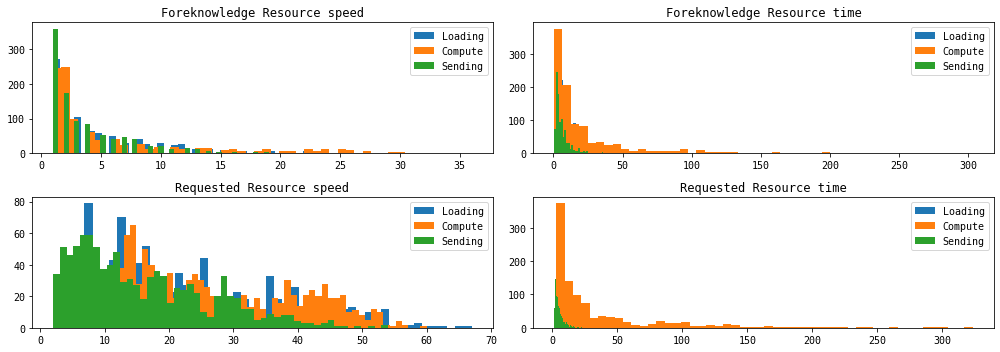

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(14, 5))

loading_speed, loading_time = get_usage_time('storage', 'loading speed', 'non-elastic foreknowledge tasks', mean=False)
compute_speed, compute_time = get_usage_time('computation', 'compute speed', 'non-elastic foreknowledge tasks', mean=False)
sending_speed, sending_time = get_usage_time('results data', 'sending speed', 'non-elastic foreknowledge tasks', mean=False)

axs[0, 0].set_title('Foreknowledge Resource speed')
for speed, name in zip((loading_speed, compute_speed, sending_speed), ('Loading', 'Compute', 'Sending')):
    axs[0, 0].hist(speed, label=name, bins=50)
axs[0, 0].legend()    
    
axs[0, 1].set_title('Foreknowledge Resource time')
for time, name in zip((loading_time, compute_time, sending_time), ('Loading', 'Compute', 'Sending')):
    axs[0, 1].hist(time, label=name, bins=50)
axs[0, 1].legend()

loading_speed, loading_time = get_usage_time('storage', 'loading speed', 'non-elastic requested tasks', mean=False)
compute_speed, compute_time = get_usage_time('computation', 'compute speed', 'non-elastic requested tasks', mean=False)
sending_speed, sending_time = get_usage_time('results data', 'sending speed', 'non-elastic requested tasks', mean=False)

axs[1, 0].set_title('Requested Resource speed')
for speed, name in zip((loading_speed, compute_speed, sending_speed), ('Loading', 'Compute', 'Sending')):
    axs[1, 0].hist(speed, label=name, bins=50)
axs[1, 0].legend()    
    
axs[1, 1].set_title('Requested Resource time')
for time, name in zip((loading_time, compute_time, sending_time), ('Loading', 'Compute', 'Sending')):
    axs[1, 1].hist(time, label=name, bins=50)
axs[1, 1].legend()
plt.tight_layout()

Foreknowledge server storage: 164.14, computation: 23.663, bandwidth: 34.45


(array([149., 251., 234., 165.,  87.,  59.,  29.,  17.,   7.,   2.]),
 array([  8. ,  17.7,  27.4,  37.1,  46.8,  56.5,  66.2,  75.9,  85.6,
         95.3, 105. ]),
 <BarContainer object of 10 artists>)

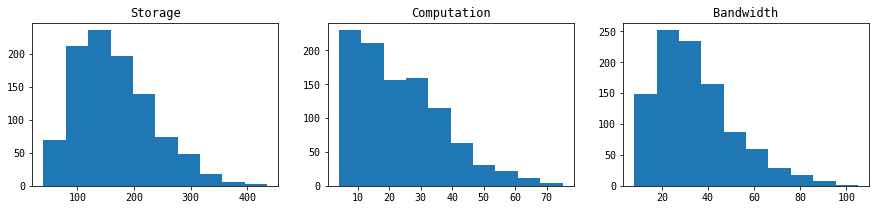

In [22]:
server_storage, server_computation, server_bandwidth = [], [], []

num_tasks = 4
for _ in range(1000):
    random_foreknowledge_tasks = rnd.choices(model['non-elastic foreknowledge tasks'], k=num_tasks)
    
    server_storage.append(sum(task['storage'] for task in random_foreknowledge_tasks))
    server_computation.append(sum(task['compute speed'] for task in random_foreknowledge_tasks))
    server_bandwidth.append(sum(task['loading speed'] + task['sending speed'] for task in random_foreknowledge_tasks))
    
print(f'Foreknowledge server storage: {np.mean(server_storage)}, computation: {np.mean(server_computation)}, '
      f'bandwidth: {np.mean(server_bandwidth)}')

fig, axs = plt.subplots(1, 3, figsize=(15, 3))
axs[0].set_title('Storage')
axs[0].hist(server_storage)
axs[1].set_title('Computation')
axs[1].hist(server_computation)
axs[2].set_title('Bandwidth')
axs[2].hist(server_bandwidth)

Requested server storage: 613.745, computation: 112.625, bandwidth: 151.474


(array([ 35.,  87., 186., 237., 210., 132.,  60.,  38.,  11.,   4.]),
 array([ 43. ,  70.7,  98.4, 126.1, 153.8, 181.5, 209.2, 236.9, 264.6,
        292.3, 320. ]),
 <BarContainer object of 10 artists>)

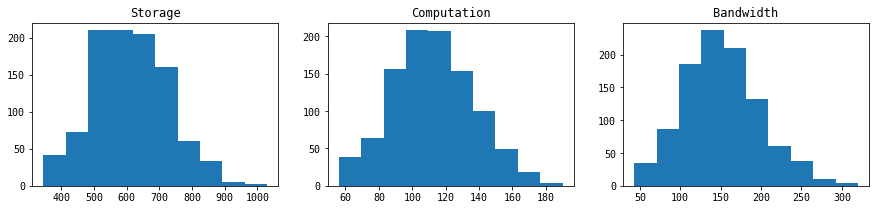

In [23]:
server_storage, server_computation, server_bandwidth = [], [], []

num_tasks = 4
for _ in range(1000):
    random_foreknowledge_tasks = rnd.choices(model['non-elastic requested tasks'], k=num_tasks)
    
    server_storage.append(sum(task['storage'] for task in random_foreknowledge_tasks))
    server_computation.append(sum(task['compute speed'] for task in random_foreknowledge_tasks))
    server_bandwidth.append(sum(task['loading speed'] + task['sending speed'] for task in random_foreknowledge_tasks))
    
print(f'Requested server storage: {np.mean(server_storage)}, computation: {np.mean(server_computation)}, '
      f'bandwidth: {np.mean(server_bandwidth)}')

fig, axs = plt.subplots(1, 3, figsize=(15, 3))
axs[0].set_title('Storage')
axs[0].hist(server_storage)
axs[1].set_title('Computation')
axs[1].hist(server_computation)
axs[2].set_title('Bandwidth')
axs[2].hist(server_bandwidth)

In [28]:
model = data['Storage: 1000, computation: 0.5, results data: 10']

Foreknowledge server storage: 329.6, computation: 56.742, bandwidth: 73.256


(array([101., 257., 233., 141., 118.,  82.,  36.,  21.,   7.,   4.]),
 array([ 11.,  32.,  53.,  74.,  95., 116., 137., 158., 179., 200., 221.]),
 <BarContainer object of 10 artists>)

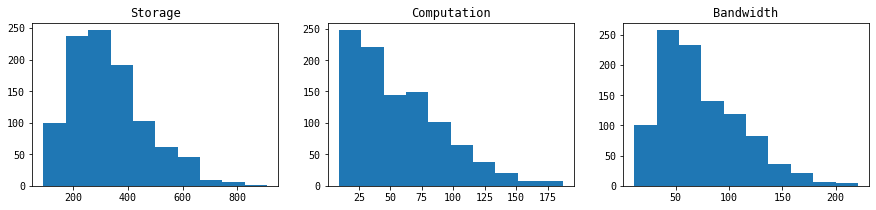

In [30]:
server_storage, server_computation, server_bandwidth = [], [], []

num_tasks = 4
for _ in range(1000):
    random_foreknowledge_tasks = rnd.choices(model['non-elastic foreknowledge tasks'], k=num_tasks)
    
    server_storage.append(sum(task['storage'] for task in random_foreknowledge_tasks))
    server_computation.append(sum(task['compute speed'] for task in random_foreknowledge_tasks))
    server_bandwidth.append(sum(task['loading speed'] + task['sending speed'] for task in random_foreknowledge_tasks))
    
print(f'Foreknowledge server storage: {np.mean(server_storage)}, computation: {np.mean(server_computation)}, '
      f'bandwidth: {np.mean(server_bandwidth)}')

fig, axs = plt.subplots(1, 3, figsize=(15, 3))
axs[0].set_title('Storage')
axs[0].hist(server_storage)
axs[1].set_title('Computation')
axs[1].hist(server_computation)
axs[2].set_title('Bandwidth')
axs[2].hist(server_bandwidth)

### Server scalings

In [33]:
data = {}
for filename in os.listdir('../data/alibaba/'):
    if 'server_scaling' in filename:
        with open(f'../data/alibaba/{filename}') as file:
            data = {**data, **json.load(file)}
for key in list(data.keys()):
    sizes = key.split(', ')
    data[f'Storage mean: {sizes[0]}, Computational mean: {sizes[1]}, Bandwidth mean: {sizes[2]}'] = data.pop(key)
    
os.listdir('../data/alibaba'), list(data.keys()), len(data)

(['server_scaling_4.json',
  'foreknowledge_alibaba_r_t15_s3_dt06-01_11-10-40.json',
  'foreknowledge_alibaba_r_t20_s4_dt06-01_11-10-40.json',
  'server_scaling_5.json',
  'server_scaling_2.json',
  'server_scaling.json',
  'model_scaling.json',
  'server_scaling_3.json',
  'greedy',
  'foreknowledge_alibaba_r_t20_s4_dt05-31_14-43-24.json',
  'foreknowledge_alibaba_r_t15_s3_dt05-31_14-40-12.json',
  'foreknowledge_alibaba_r_t10_s2_dt05-31_14-35-19.json',
  'foreknowledge_alibaba_r_t10_s2_dt06-01_11-10-40.json'],
 ['Storage mean: 400, Computational mean: 50, Bandwidth mean: 120',
  'Storage mean: 400, Computational mean: 60, Bandwidth mean: 150',
  'Storage mean: 400, Computational mean: 70, Bandwidth mean: 160',
  'Storage mean: 329, Computational mean: 77, Bandwidth mean: 171',
  'Storage mean: 300, Computational mean: 60, Bandwidth mean: 150',
  'Storage mean: 300, Computational mean: 60, Bandwidth mean: 60',
  'Storage mean: 340, Computational mean: 90, Bandwidth mean: 190',
  'Stor

| k | Avg Storage | Avg Computation | Avg Bandwidth |
|---|---|---|---|
1 | 71.8 | 14.3 | 33.5 |
2 | 160.1 | 34.7 | 76.5 |
3 | 238.0 | 56.3 | 118.8 |
4 | 327.4 | 75.8 | 162.1 |
5 | 416.4 | 96.2 | 205.9 |

In [34]:
algos = [greedy_algo, 'Non-elastic Optimal']

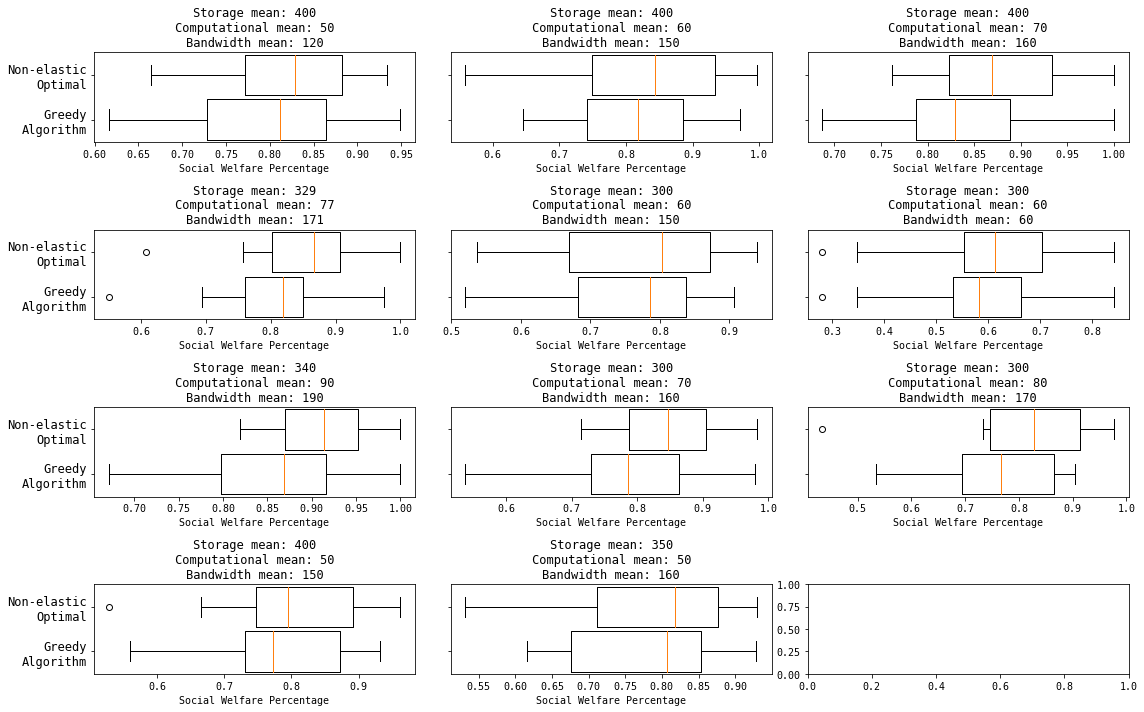

In [35]:
cols = 3
rows = ceil(len(data) / cols)
fig, axs = plt.subplots(rows, cols, figsize=(16, 2.5 * rows))
for pos, (name, results) in enumerate(data.items()):
    ax = axs[floor(pos / cols), pos % cols]
    ax.boxplot([[result[algo]['social welfare percent'] for result in results] for algo in algos], 
               vert=False, widths=0.9)
    ax.set_xlabel('Social Welfare Percentage')
    ax.set_yticklabels([''] * len(algos))
    ax.set_title(name.replace(', ', '\n'))

[ax.set_yticklabels(['Greedy\nAlgorithm', 'Non-elastic\nOptimal'], fontsize=12) for ax in axs[:, 0]]
fig.tight_layout()

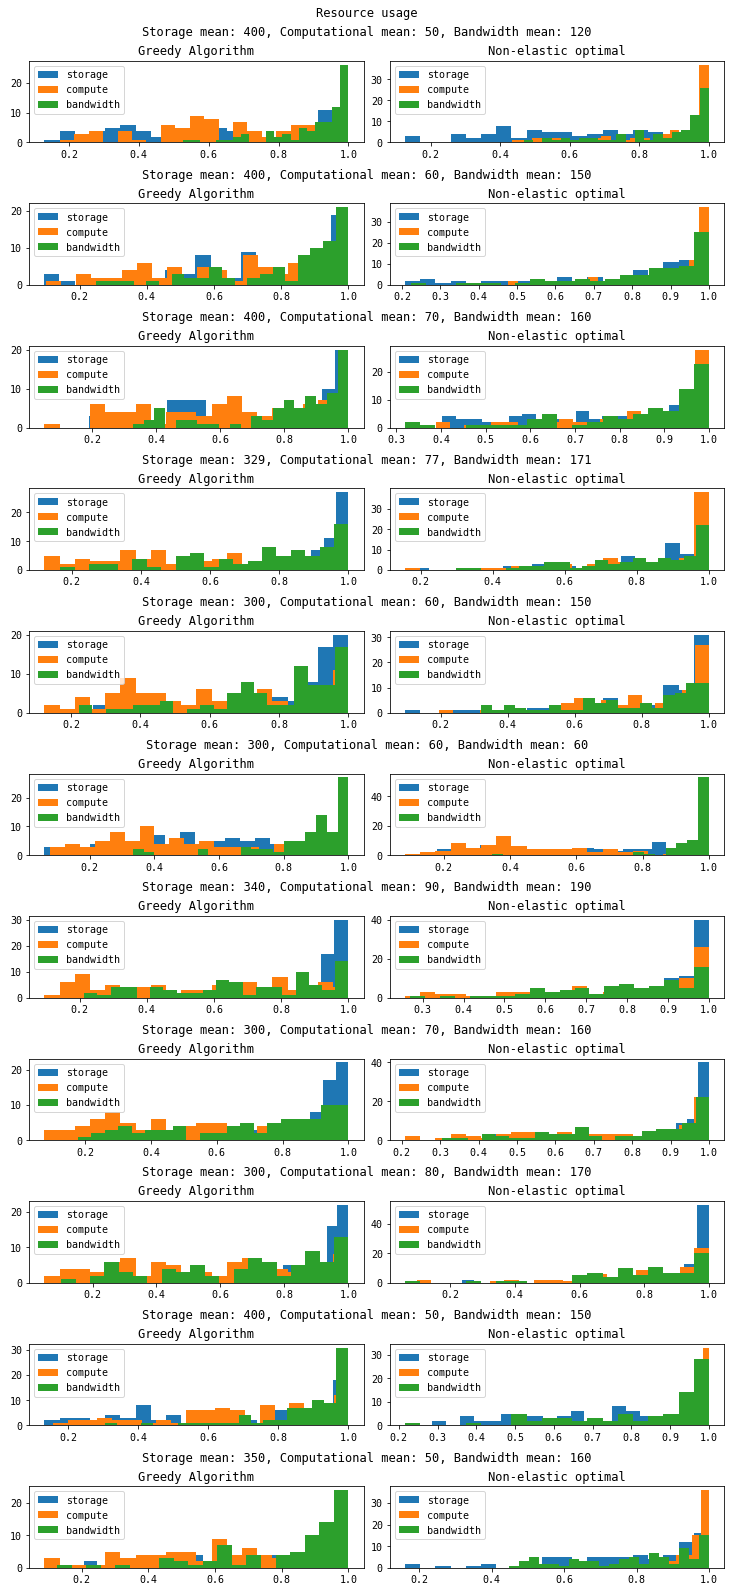

In [37]:
fig = plt.figure(constrained_layout=True, figsize=(10, 2 * len(data)))
fig.suptitle('Resource usage')

subfigs = fig.subfigures(len(data), 1)
for pos, (subfig, (name, results)) in enumerate(zip(subfigs, data.items())):
    subfig.suptitle(name)
    axs = subfig.subplots(nrows=1, ncols=2)
    
    algo_resource_usage = {algo: {'storage': [], 'compute': [], 'bandwidth': []} for algo in algos}
    for result in results:
        for algo in algos:
            if algo in result:
                algo_resource_usage[algo]['storage'] += list(result[algo]['server storage usage'].values())
                algo_resource_usage[algo]['compute'] += list(result[algo]['server compute usage'].values())
                algo_resource_usage[algo]['bandwidth'] += list(result[algo]['server bandwidth usage'].values())

    for ax, (algo, resource_usage), name in zip(axs, algo_resource_usage.items(), 
                                                ['Greedy Algorithm', 'Non-elastic optimal']):
        ax.set_title(name)
        for resource, usage in resource_usage.items():
            ax.hist(usage, bins=20, label=resource)
        ax.legend()